In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


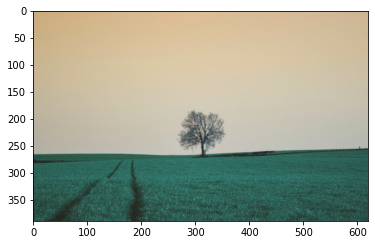

In [3]:
img = cv2.imread('./assets/imagens/paisagem01.jpg')
plt.imshow(img)
plt.show() #bgr é o formato usado pelo OPENCV

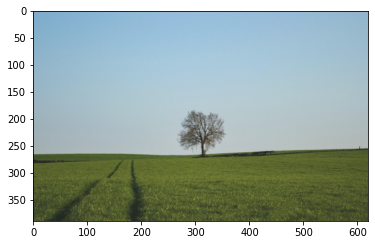

In [4]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb);

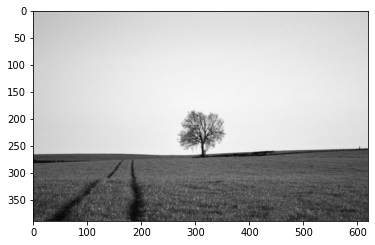

In [5]:
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray');

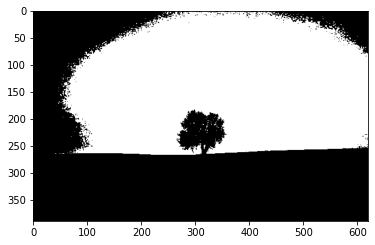

In [6]:
limiar = 180 #0 - 255

val, thresh = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray');

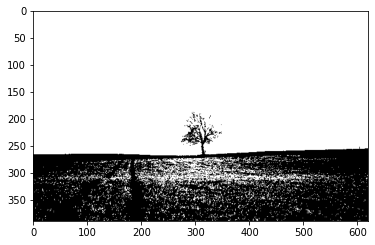

In [7]:
limiar = 100 #0 - 255

val, thresh = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray');

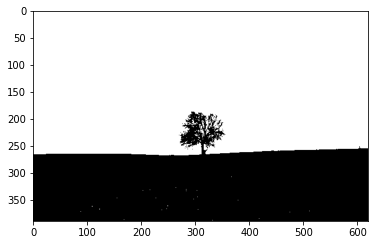

In [8]:
limiar = 140 #
val, thresh = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray');

In [9]:
def showImg(imagem):
    fig = plt.gcf()
    fig.set_size_inches(18,6)
    plt.imshow(imagem, cmap='gray')
    plt.axis('off')
    plt.show()

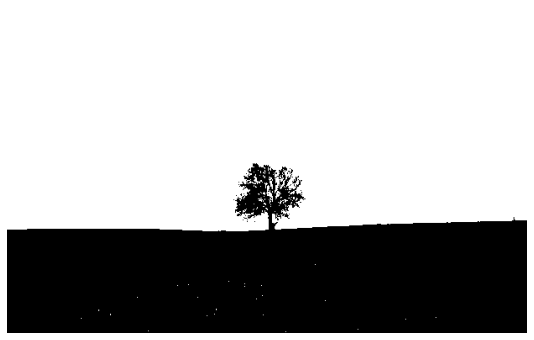

In [10]:
showImg(thresh)

In [11]:
cv2.imwrite('resultado_threshold.jpg', thresh)

True

    Tipos de Limiarização

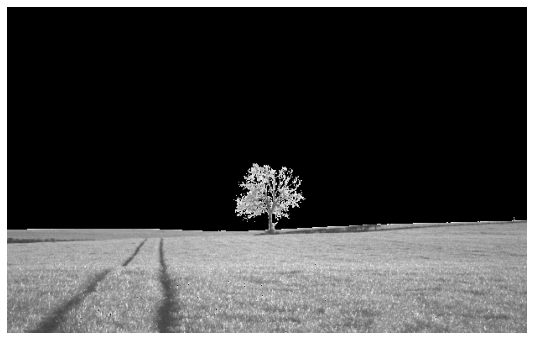

In [12]:
#_, thresh = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)
#_, thresh = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY_INV)
#_, thresh = cv2.threshold(gray, limiar, 255, cv2.THRESH_TRUNC)
#_, thresh = cv2.threshold(gray, limiar, 255, cv2.THRESH_TOZERO)
_, thresh = cv2.threshold(gray, limiar, 255, cv2.THRESH_TOZERO_INV)
showImg(thresh)


In [13]:
def showLimiarization(img, limiar = 127):
    _, thresh_binary = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)
    _, thresh_binary_inv = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY_INV)
    _, thresh_trunc = cv2.threshold(gray, limiar, 255, cv2.THRESH_TRUNC)
    _, thresh_tozero = cv2.threshold(gray, limiar, 255, cv2.THRESH_TOZERO)
    _, thresh_tozero_inv = cv2.threshold(gray, limiar, 255, cv2.THRESH_TOZERO_INV)
    
    titulos = ['Original', 'Binary', 'Binary inv', 'Trunc', 'To zero', 'To zero inv']
    imagens = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]
    
    fig = plt.gcf()
    fig.set_size_inches(18,12)
    for i in range(6):
        plt.subplot(2, 3, i+1 )
        plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap = 'gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

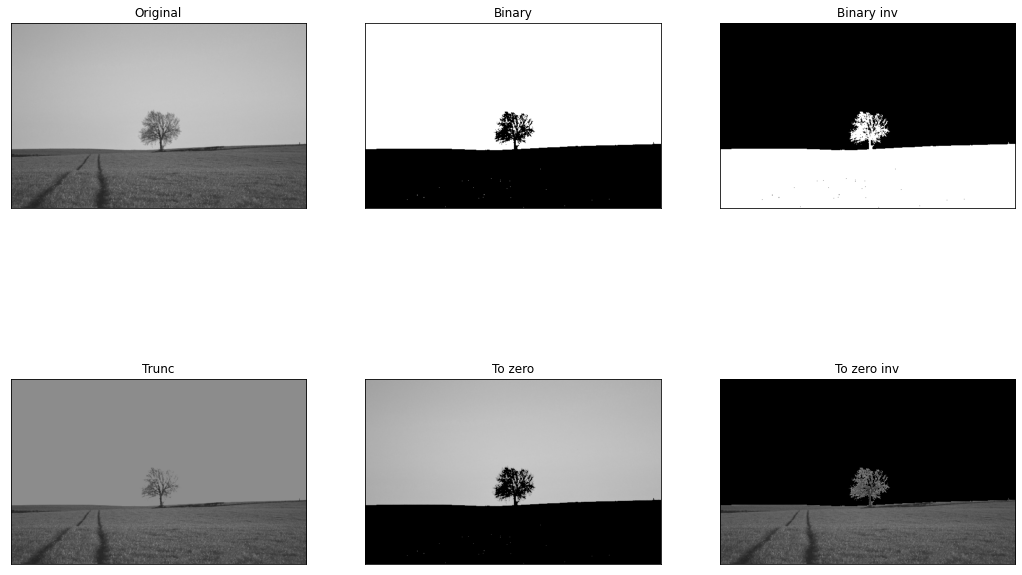

In [14]:
showLimiarization(gray, limiar)

    Exemplos com tomografia

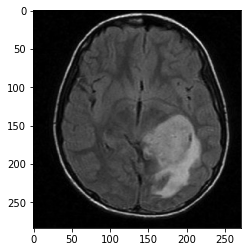

In [15]:
img = cv2.imread('./assets/imagens/ct-scan.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray');

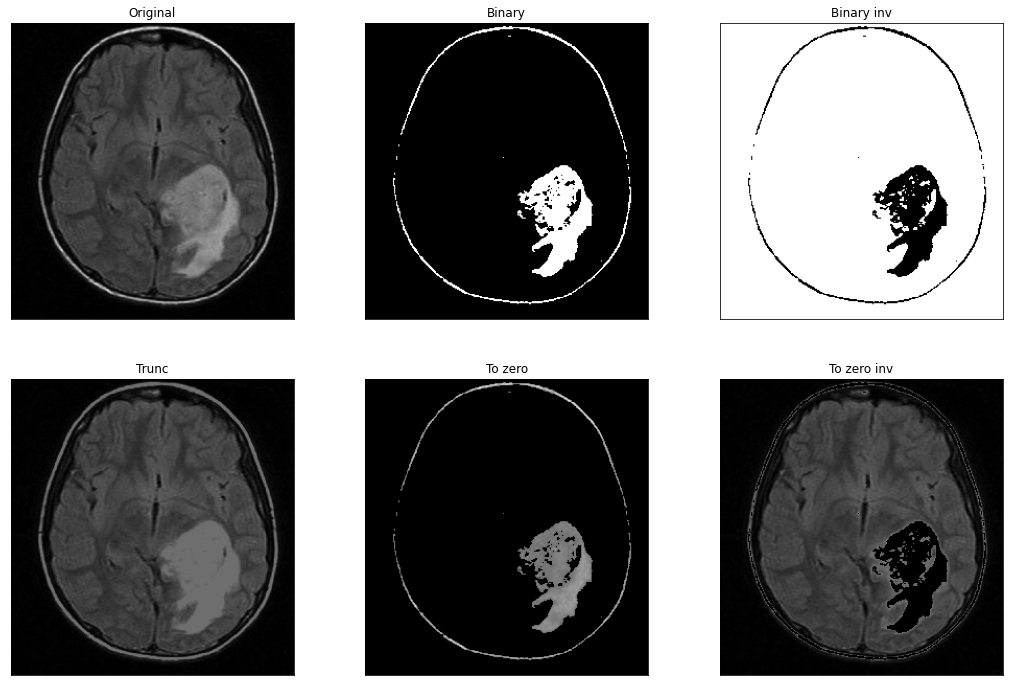

In [16]:
limiar = 110
showLimiarization(gray, limiar)

    Exercicio imagem infravermelho

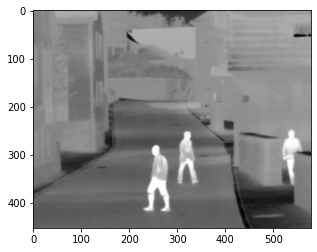

In [17]:
img = cv2.imread('./assets/imagens/thermal01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray');

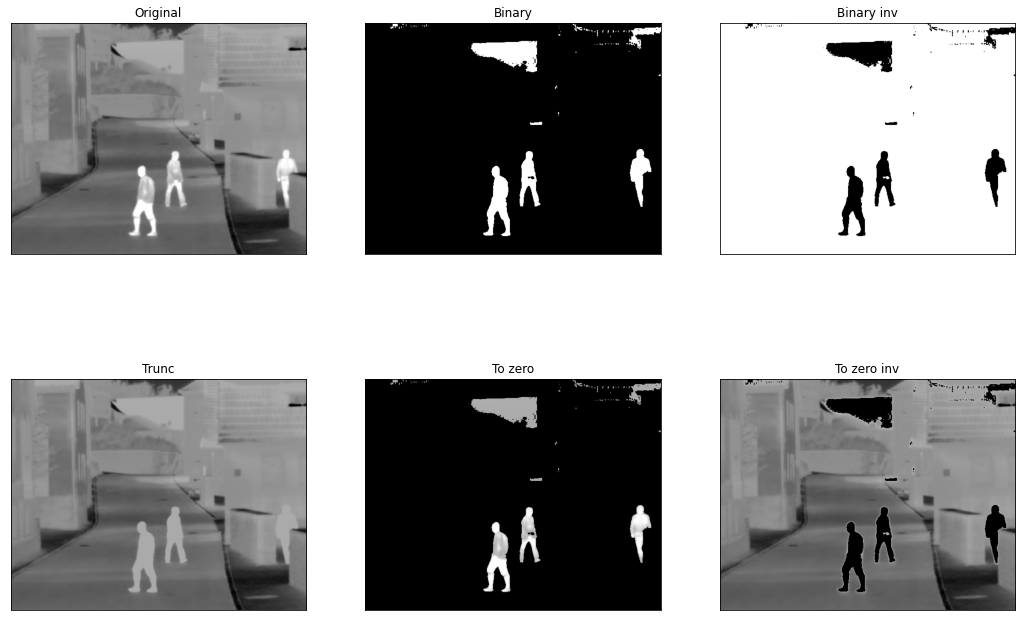

In [18]:
limiar = 170
showLimiarization(img, limiar)

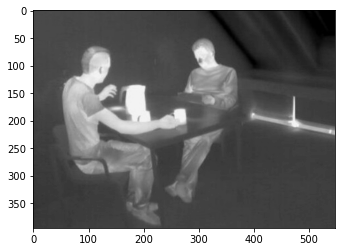

In [19]:
img = cv2.imread('./assets/imagens/thermal02.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray');

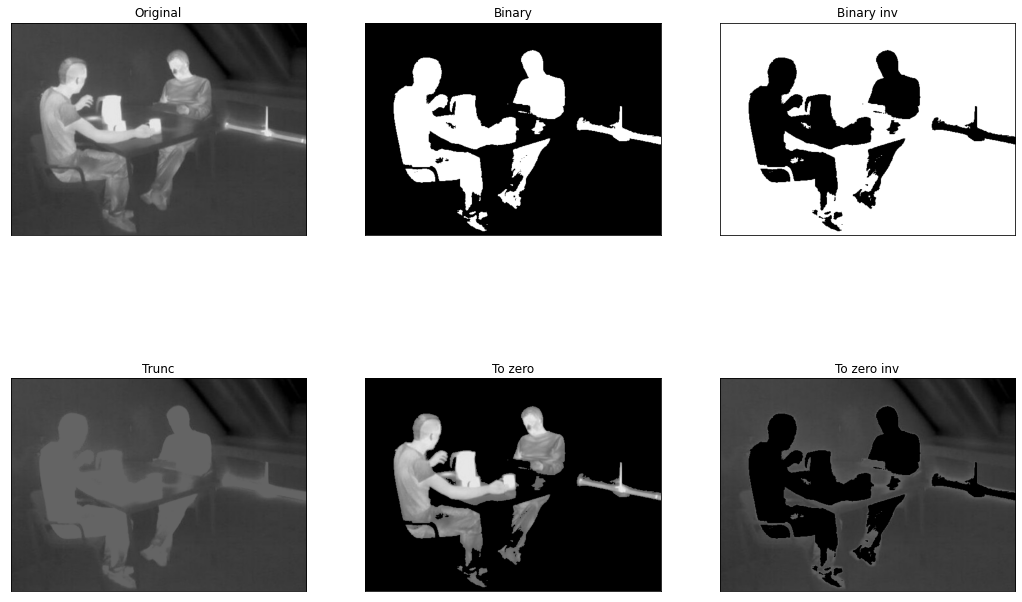

In [20]:
limiar = 100
showLimiarization(img, limiar)

    Separação de imagens

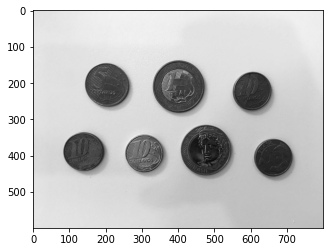

In [21]:
img = cv2.imread('./assets/imagens/moedas01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray');

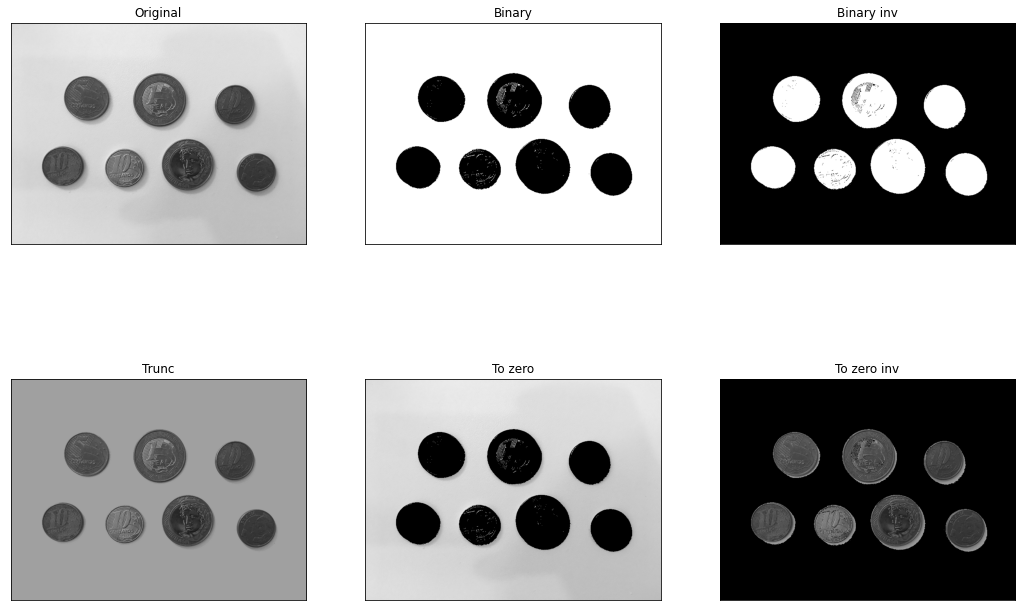

In [22]:
limiar = 160
showLimiarization(gray, limiar)

    Metodo de Otsu
    
    Faz a escolha do limiar automaticamente

In [23]:
img = cv2.imread('./assets/')

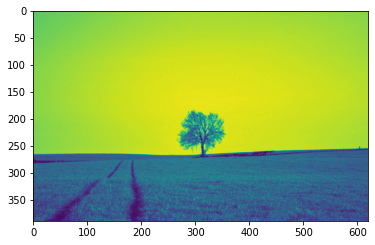

In [24]:
img = cv2.imread('./assets/imagens/paisagem01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

In [25]:
valor, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(f'Valor de Limiar Otsu: {valor}')

Valor de Limiar Otsu: 136.0


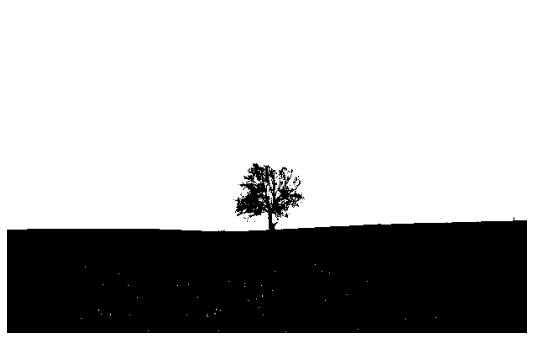

In [26]:
showImg(otsu)


    Histogramas

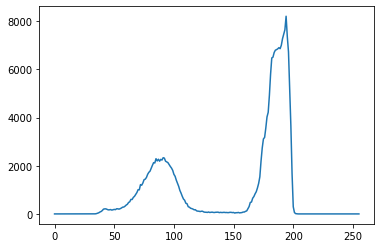

In [27]:
histograma, bins = np.histogram(gray, 256, [0, 256]);
plt.plot(histograma);

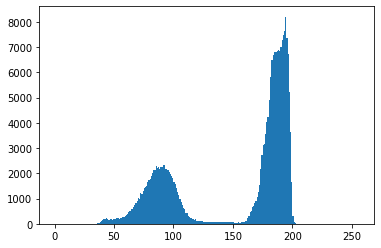

In [28]:

plt.hist(gray.ravel(), 256, [0, 256]);

    Imagens com ruido
   

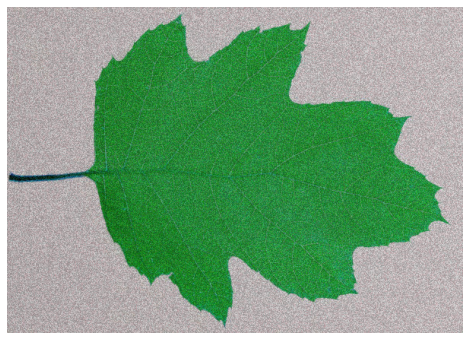

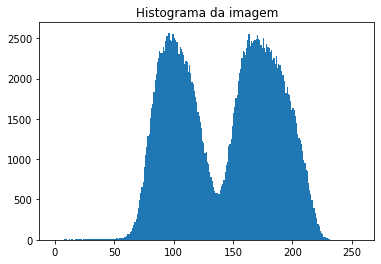

In [29]:
img = cv2.imread('./assets/imagens/folha_ruido.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
showImg(img)
plt.hist(gray.ravel(), 256, [0,256])

plt.title('Histograma da imagem')
plt.show()

Valor do limiar 139.0


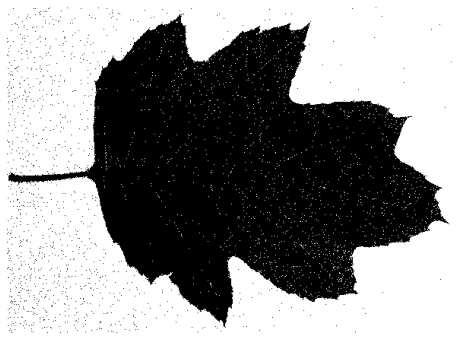

In [30]:
valor, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Valor do limiar' , valor)
showImg(otsu)

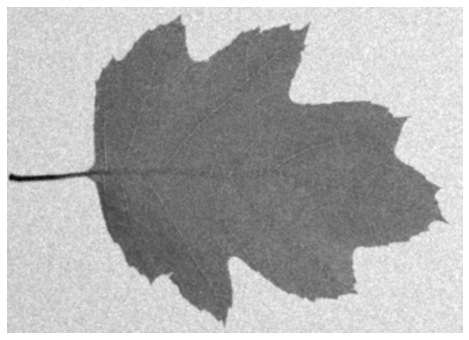

In [31]:
desfoque = cv2.GaussianBlur(gray, (5,5), 0)
showImg(desfoque)

Valor do limiar 139.0


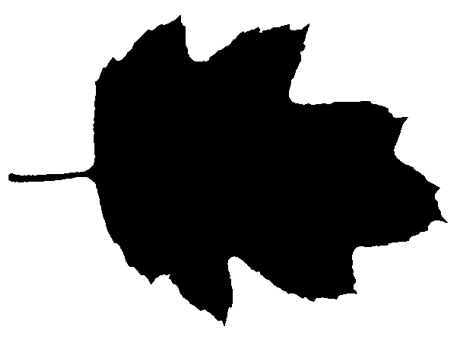

In [32]:
valor, otsu = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Valor do limiar' , valor)
showImg(otsu)

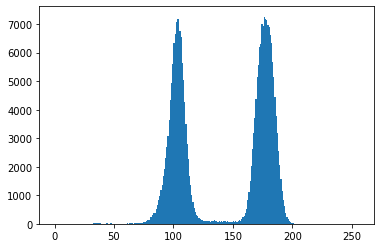

In [33]:
plt.hist(desfoque.ravel(), 256, [0,256]);

    Limiariazação Adaptativa

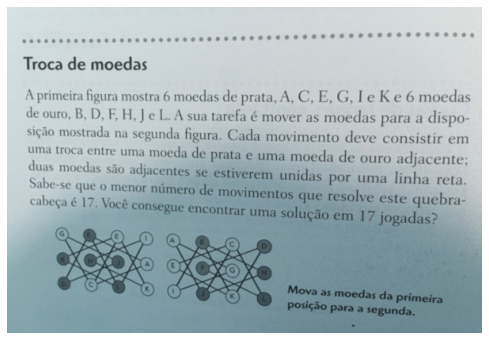

In [34]:
img = cv2.imread('./assets/imagens/livro-texto.jpg')
showImg(img)

175.0


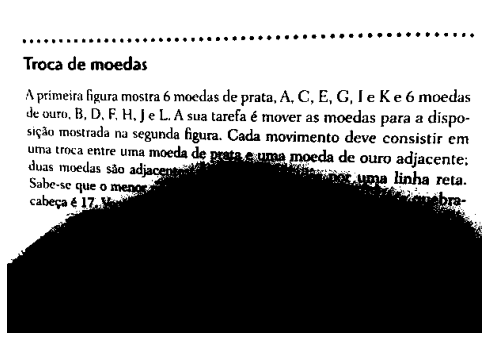

In [35]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
valor, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(valor)
showImg(otsu)

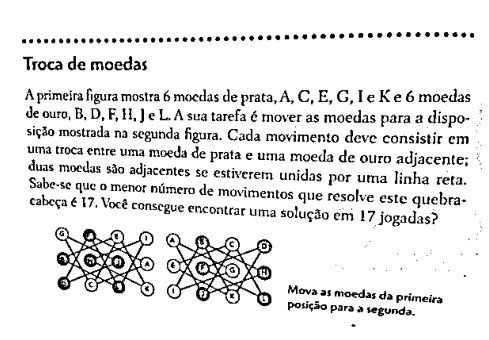

In [36]:
adapt_media = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
showImg(adapt_media)

    Limiarização adaptativa Gaussiana
   

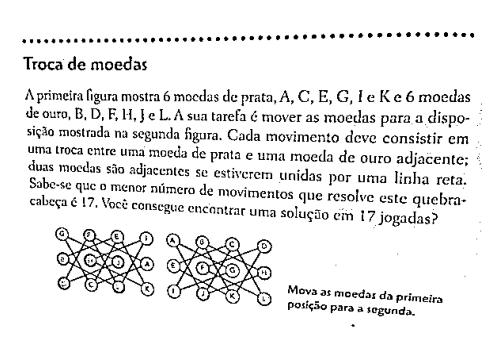

In [37]:
adapt_gauss = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
showImg(adapt_gauss)

In [38]:
def limiarizacao_adaptativa(img, limiar=140, block_size = 11, C =9):
    _, limiar_global = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY)
    limiar_media = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 
    block_size, C)
    
    limiar_gauss = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 
    block_size, C)
    
    imagens = [img, limiar_global, limiar_media, limiar_gauss]
    titulos = [
        'Original', 
        'Limiarização Global', 
        'Limiarização adaptativa - Média',
        'Limiarização adaptativa - Gaussiana'
    ]
    
    fig = plt.gcf()
    fig.set_size_inches(18,12)
    
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])

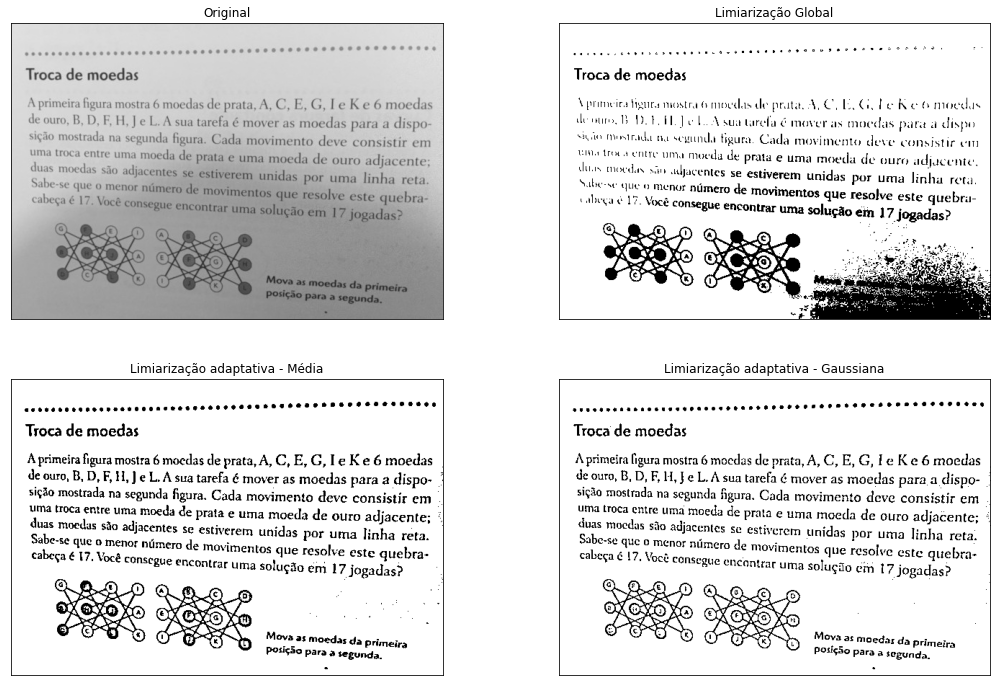

In [39]:
limiarizacao_adaptativa(gray)

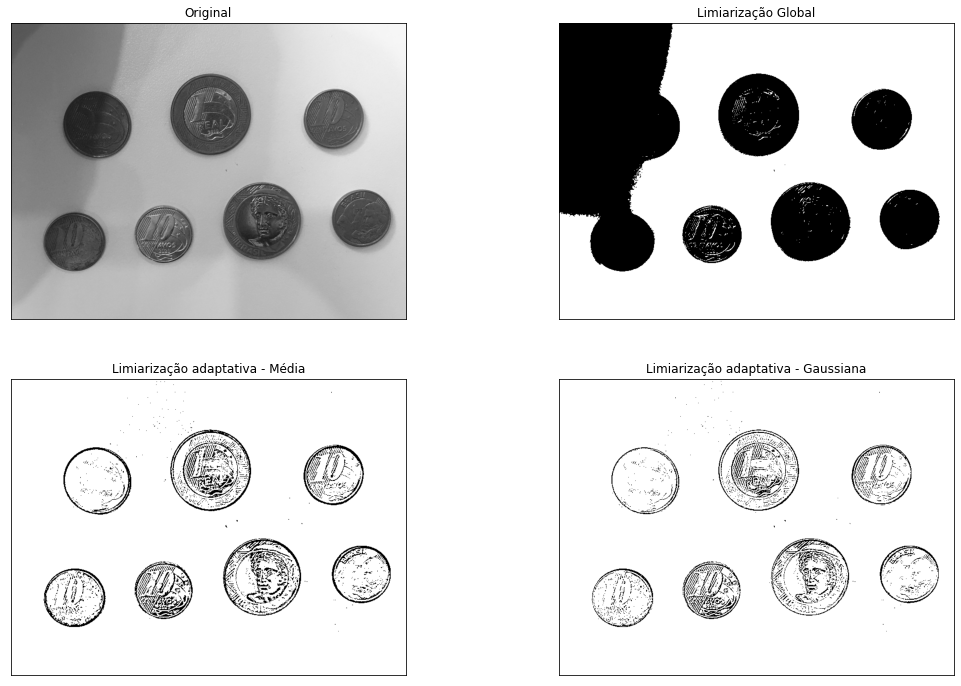

In [40]:
img = cv2.imread('./assets/imagens/moedas02.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
limiarizacao_adaptativa(gray, C=10)

    Segmentação com contornos
    
    Abertura -> primeiro fecha os pixel e depois abre para eliminar ruidos externos a imagem
    
    fechamento -> primeiro abre os pixel e depois fecha para eliminar ruidos internos a imagem

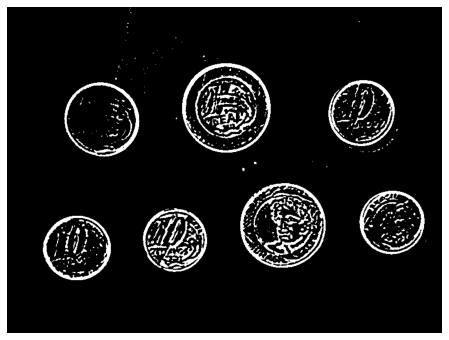

In [41]:
img_processada = img.copy()
desfoque = cv2.GaussianBlur(gray, (7,7), 0)
adapt_gauss = cv2.adaptiveThreshold(
    desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 15, 3
)
showImg(adapt_gauss)

In [42]:
#abertura
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

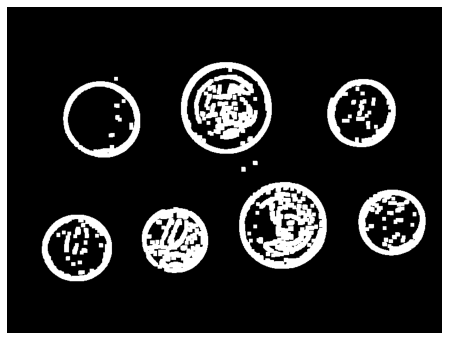

In [43]:
erosao = cv2.erode(adapt_gauss, kernel)
dilatacao = cv2.dilate(erosao, kernel, iterations=3) #iterations server para enfatizar as bordas
showImg(dilatacao)

In [44]:
elementos = dilatacao.copy()
contornos, hierarquia = cv2.findContours(
    elementos, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

In [45]:
print(contornos)

(array([[[117, 383]],

       [[116, 384]],

       [[112, 384]],

       [[111, 385]],

       [[109, 385]],

       [[108, 386]],

       [[106, 386]],

       [[105, 387]],

       [[103, 387]],

       [[102, 388]],

       [[101, 388]],

       [[100, 389]],

       [[ 99, 389]],

       [[ 98, 390]],

       [[ 97, 390]],

       [[ 96, 391]],

       [[ 95, 391]],

       [[ 93, 393]],

       [[ 92, 393]],

       [[ 91, 394]],

       [[ 90, 394]],

       [[ 86, 398]],

       [[ 85, 398]],

       [[ 85, 399]],

       [[ 83, 401]],

       [[ 82, 401]],

       [[ 82, 402]],

       [[ 78, 406]],

       [[ 78, 407]],

       [[ 75, 410]],

       [[ 75, 411]],

       [[ 73, 413]],

       [[ 73, 414]],

       [[ 71, 416]],

       [[ 71, 418]],

       [[ 70, 419]],

       [[ 70, 420]],

       [[ 69, 421]],

       [[ 69, 422]],

       [[ 68, 423]],

       [[ 68, 425]],

       [[ 67, 426]],

       [[ 67, 427]],

       [[ 66, 428]],

       [[ 66, 430]],

       [[

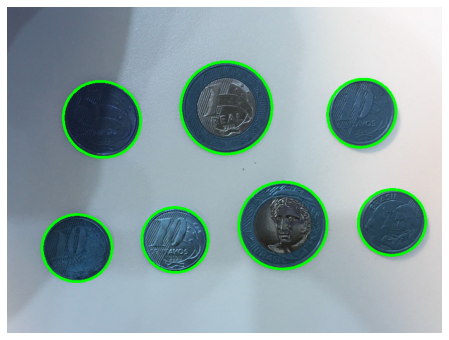

In [46]:
img_processada = img.copy()
for cnt in contornos:
    area = cv2.contourArea(cnt)
    if len(cnt) >= 100: #valor definido pelos contornos encontrados cnt
        elipse = cv2.fitEllipse(cnt)
        cv2.ellipse(img_processada, elipse, (0,255,0), 3)
showImg(img_processada)

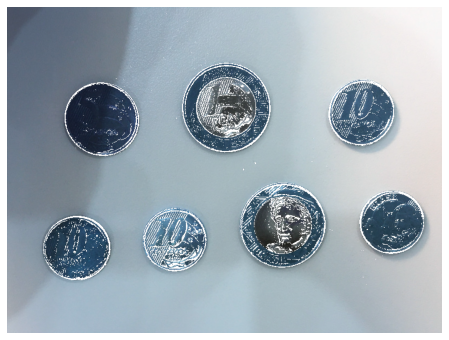

In [47]:
adapt_gauss = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 15, 11
)
sobrepor = cv2.add(img, cv2.cvtColor(adapt_gauss, cv2.COLOR_GRAY2BGR))
showImg(sobrepor)

    Segmentação baseada em bordas

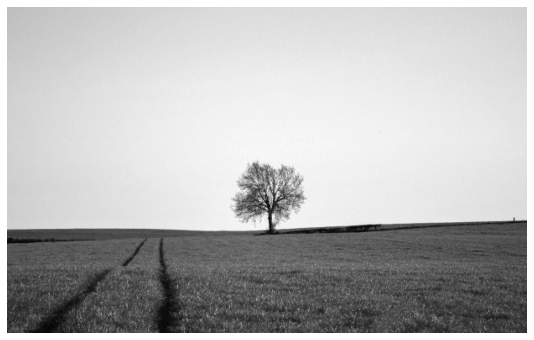

In [48]:
img = cv2.imread('./assets/imagens/paisagem01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
showImg(gray)

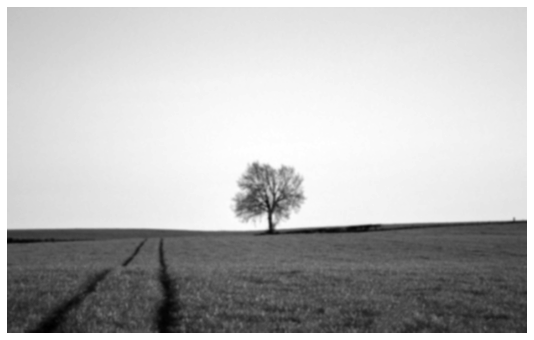

In [49]:
desfoque = cv2.GaussianBlur(gray, (5,5), 0)
showImg(desfoque)

    Operador Sobel

In [50]:
#Primeira forma
#definindo kernel e matriz
k_sobelX = np.array(([-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]), np.float32);

k_sobelY = np.array(([-1, -2, 1],
                     [0, 0, 0],
                     [1, 2, 1]), np.float32);
sobel_x = cv2.filter2D(desfoque, cv2.CV_64F, k_sobelX)
sobel_y = cv2.filter2D(desfoque, cv2.CV_64F, k_sobelY)

In [51]:
#Segunda forma
# terceiro e quarto parametro definem direção da derivada
# 1, 0 -> direçao x
# 0, 1 -> direçao y
sobel_x = cv2.Sobel(desfoque, cv2.CV_64F, 1, 0, ksize = 3) 
sobel_y = cv2.Sobel(desfoque, cv2.CV_64F, 0, 1, ksize = 3)

In [52]:
#Converte valores para abs
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

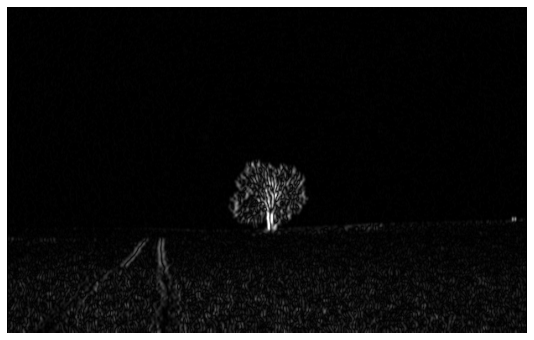

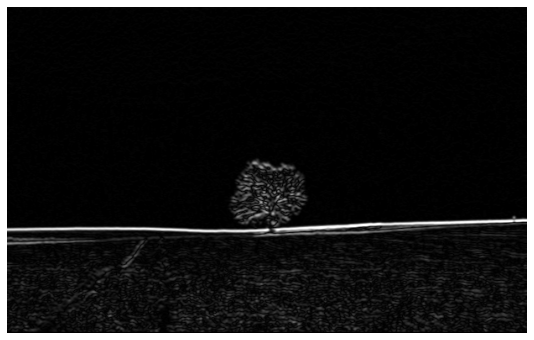

In [53]:
showImg(sobel_x)
showImg(sobel_y)

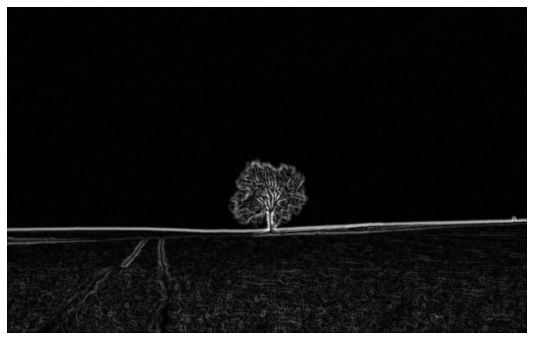

In [54]:
#Necessario concatenar para que o filtro em X e Y se juntem
sobel = cv2.addWeighted(src1 = sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma = 0)
showImg(sobel)

        Canny Edge
        

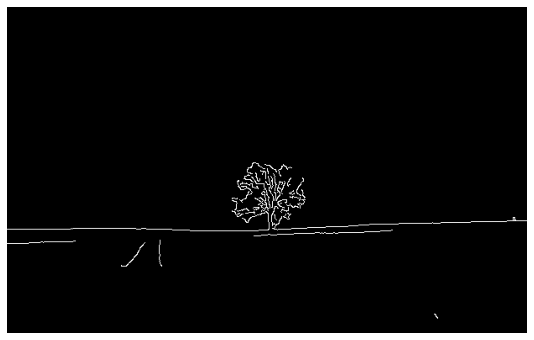

In [55]:
canny = cv2.Canny(desfoque, 80, 140) #Limiar baixo | limiar alto
showImg(canny)

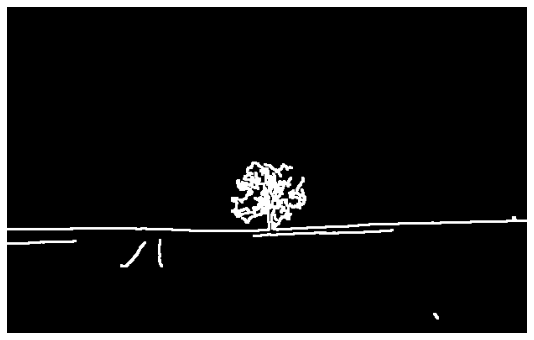

In [56]:
#Aplicando dilatação para aumentar bordas
dilatacao = cv2.dilate(canny, np.ones((3,3), np.uint8))
showImg(dilatacao)

In [59]:
def segmentacao_bordas(img): #img deve ser cinza
    desfoque = cv2.GaussianBlur(img, (5,5), 0)
    
    sobel_x = cv2.Sobel(desfoque, cv2.CV_64F, 1, 0, ksize = 3) 
    sobel_y = cv2.Sobel(desfoque, cv2.CV_64F, 0, 1, ksize = 3)
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)
    sobel = cv2.addWeighted(src1 = sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma = 0)
    
    canny = cv2.Canny(desfoque, 80, 140) #Limiar baixo | limiar alto
    kernel = np.ones((3,3), np.uint8)
    dilatacao = cv2.dilate(canny, kernel, iterations=2) #iterations server para enfatizar as bordas
    erosao = cv2.erode(dilatacao, kernel, iterations=1)
    
    imagens = [img, sobel, canny, erosao]
    titulos = ['Original', 'Sobel', 'Canny Edge', 'Canny Edge + Fechamento']
    fig = plt.gcf()
    fig.set_size_inches(18,12)
    
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])

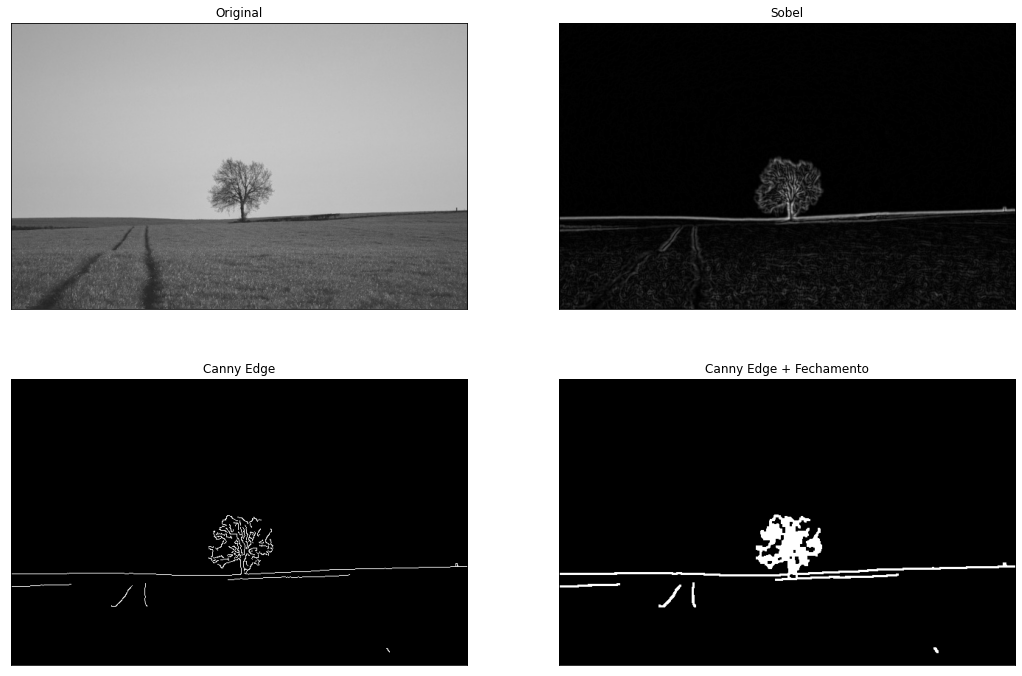

In [60]:
segmentacao_bordas(gray)

    Testes

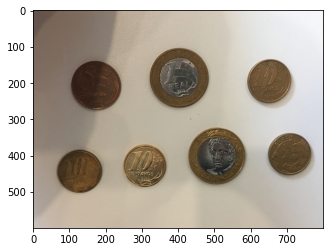

In [61]:
imagem = cv2.imread('./assets/imagens/moedas02.jpg')
rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(rgb);

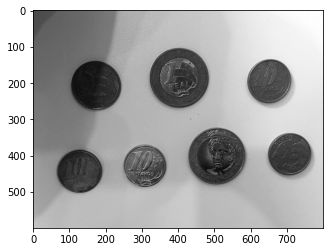

In [62]:
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray');

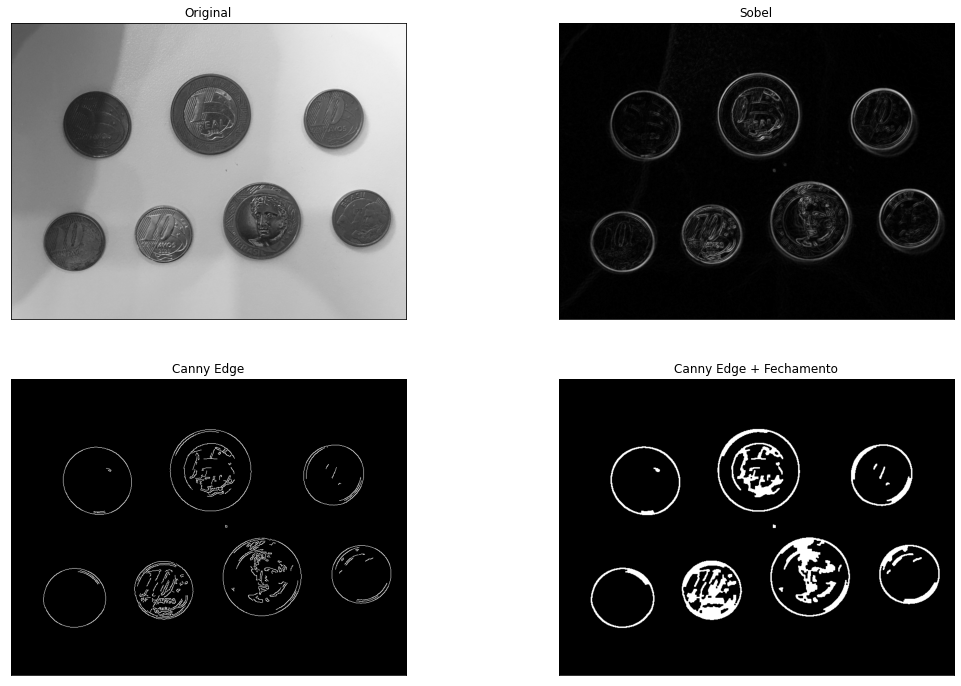

In [63]:
segmentacao_bordas(gray)

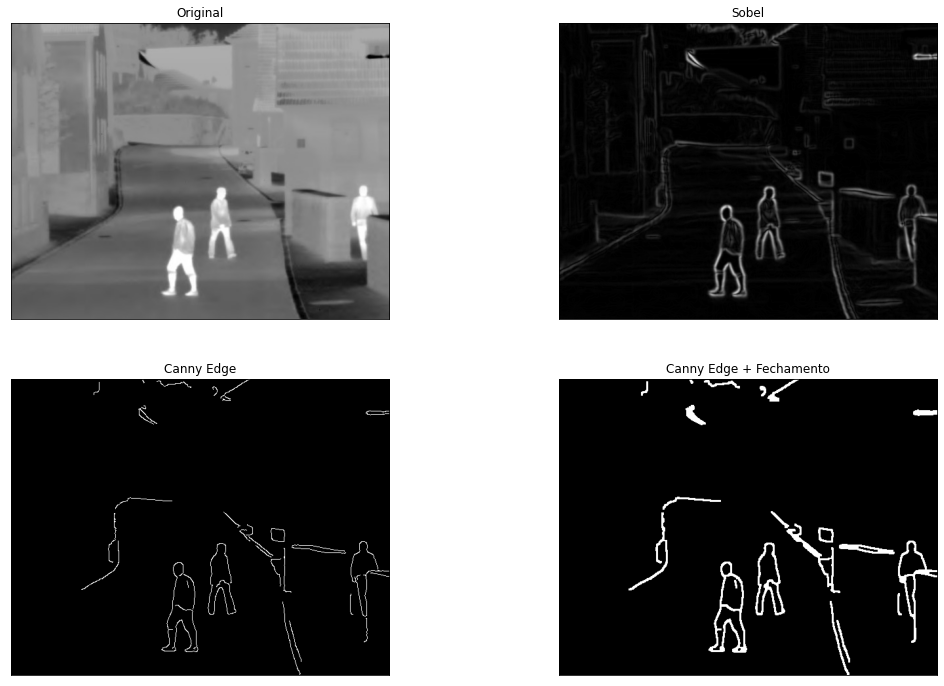

In [65]:
imagem = cv2.imread('./assets/imagens/thermal01.jpg')
gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
segmentacao_bordas(gray)

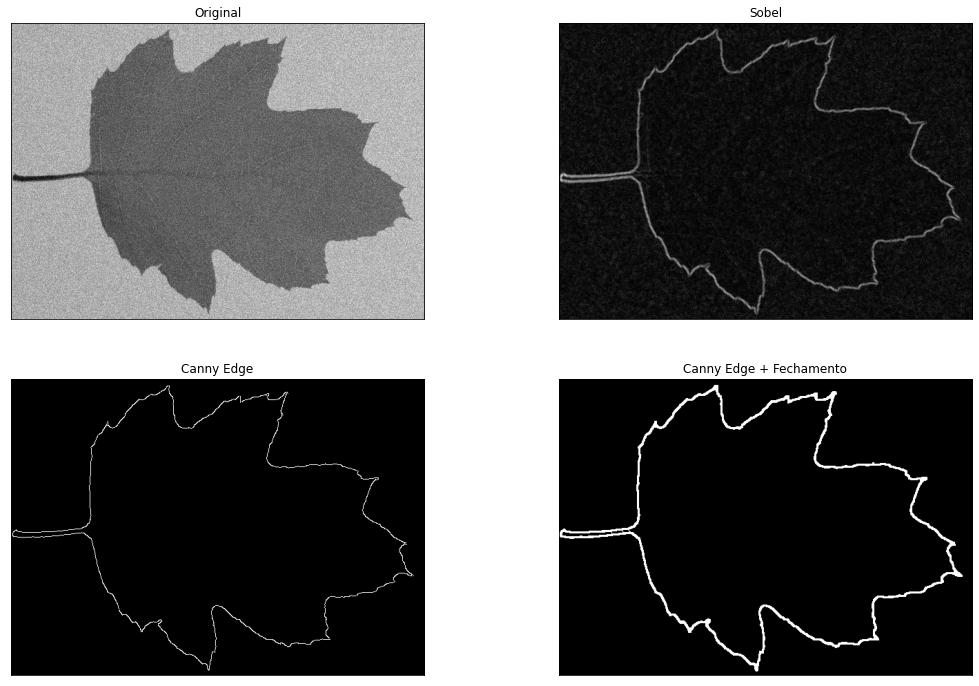

In [66]:
imagem = cv2.imread('./assets/imagens/folha_ruido.jpg')
gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
segmentacao_bordas(gray)